In [1]:
import pandas as pd
import numpy as np
import config
import datetime
from sqlalchemy import text
import plotly
import plotly.express as px
import ipywidgets
from urllib.request import urlopen
import json
import plotly.graph_objects as go
import geopandas as gpd
import warnings
import pyproj
import plotly.io as pio
print(config.version)
print(config.connection_string)
print(plotly.__version__, ipywidgets.__version__, pd.__version__, np.__version__)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore', category=UserWarning) 

3.2.0.Dev
postgresql://postgres:sa@localhost/icip
6.3.1 8.1.7 2.0.0 1.26.4


In [2]:
# Charger et filtrer les données
gdf = gpd.read_file("contours-iris.gpkg")
gdf = gdf[gdf["nom_commune"] == "Nice"].to_crs(epsg=4326)
gdf_l93 = gdf.to_crs(2154)
pts_l93 = gdf_l93.geometry.representative_point()
pts = pts_l93.to_crs(4326)
gdf["fid"] = gdf.index
gdf["lon"] = gdf.geometry.centroid.x
gdf["lat"] = gdf.geometry.centroid.y
gdf=gdf.sort_values(by="code_iris")
geojson=gdf.__geo_interface__
gdf

,cleabs,code_insee,nom_commune,iris,code_iris,nom_iris,type_iris,geometry,fid,lon,lat
2597,IRIS____0000000060880101,06088,Nice,0101,060880101,Saleya-Château,H,"MULTIPOLYGON (((7.28193 43.69312, 7.28159 43.6...",2597,7.277064,43.695476
4458,IRIS____0000000060880102,06088,Nice,0102,060880102,Vieux Nice-Sainte-Réparate,H,"MULTIPOLYGON (((7.27454 43.69773, 7.27598 43.6...",4458,7.275641,43.697293
5715,IRIS____0000000060880103,06088,Nice,0103,060880103,Vieux Nice-Visitation,H,"MULTIPOLYGON (((7.27842 43.70006, 7.27884 43.7...",5715,7.279384,43.698417
9348,IRIS____0000000060880201,06088,Nice,0201,060880201,Garibaldi,H,"MULTIPOLYGON (((7.27904 43.70126, 7.28007 43.7...",9348,7.281249,43.702325
9785,IRIS____0000000060880202,06088,Nice,0202,060880202,Port,H,"MULTIPOLYGON (((7.29038 43.69227, 7.29029 43.6...",9785,7.285948,43.695477
...,...,...,...,...,...,...,...,...,...,...,...
14763,IRIS____0000000060883501,06088,Nice,3501,060883501,Crémat-Bellet,H,"MULTIPOLYGON (((7.20972 43.75747, 7.21002 43.7...",14763,7.210291,43.733731
14773,IRIS____0000000060883601,06088,Nice,3601,060883601,Saint-Pierre de Féric,H,"MULTIPOLYGON (((7.22218 43.72576, 7.22231 43.7...",14773,7.232767,43.720739
14774,IRIS____0000000060883602,06088,Nice,3602,060883602,Costière,H,"MULTIPOLYGON (((7.22543 43.71696, 7.22593 43.7...",14774,7.235730,43.709542
14786,IRIS____0000000060883701,06088,Nice,3701,060883701,Saint-Pancrace-Pessicart,H,"MULTIPOLYGON (((7.222 43.74145, 7.22215 43.741...",14786,7.237896,43.735819


In [3]:
apl=pd.read_csv("apl06.csv", dtype={"iris_string": "str"})
apl=apl[apl["code_commune"]==6088]
apl

,year,specialite,iris,iris_string,type_iris,nb,apl,ap,accessibilite_weight,R,wpop,swpop,pop_gp,iris_label,dept,code_commune,commune_label
232,2021,10,60880101,060880101,A,2.0,132.867391,0.983951,1.0,0.983951,1559.020614,203262.169317,1559.020614,Saleya-Château,6,6088,Nice
233,2021,10,60880102,060880102,A,0.0,148.773967,0.000000,1.0,0.000000,1253.666511,230594.155400,1253.666511,Vieux Nice-Sainte-Réparate,6,6088,Nice
234,2021,10,60880103,060880103,A,5.0,105.699926,3.037994,1.0,3.037994,1688.353000,164582.301672,1688.353000,Vieux Nice-Visitation,6,6088,Nice
235,2021,10,60880201,060880201,A,4.0,163.761653,1.583149,1.0,1.583149,2498.992895,252661.049136,2498.992895,Garibaldi,6,6088,Nice
236,2021,10,60880202,060880202,A,3.0,132.238107,1.446227,1.0,1.446227,2037.110820,207436.321273,2037.110820,Port,6,6088,Nice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,2021,10,60883501,060883501,A,0.0,66.381210,0.000000,1.0,0.000000,2694.176735,107682.576265,2694.176735,Crémat-Bellet,6,6088,Nice
374,2021,10,60883601,060883601,A,0.0,67.181759,0.000000,1.0,0.000000,3083.968968,115867.133189,3083.968968,Saint-Pierre de Féric,6,6088,Nice
375,2021,10,60883602,060883602,A,1.0,85.533518,0.700502,1.0,0.700502,2231.722308,142754.705206,2231.722308,Costière,6,6088,Nice
376,2021,10,60883701,060883701,A,0.0,79.801978,0.000000,1.0,0.000000,3546.836961,131719.102220,3546.836961,Saint-Pancrace-Pessicart,6,6088,Nice


In [4]:
apl["code_iris"]=apl["iris_string"]
gdf = gdf.merge(apl, on="code_iris", how="left", suffixes=('', '_dest')).copy()
gdf

,cleabs,code_insee,nom_commune,iris,code_iris,nom_iris,type_iris,geometry,fid,lon,lat,year,specialite,iris_dest,iris_string,type_iris_dest,nb,apl,ap,accessibilite_weight,R,wpop,swpop,pop_gp,iris_label,dept,code_commune,commune_label
0,IRIS____0000000060880101,06088,Nice,0101,060880101,Saleya-Château,H,"MULTIPOLYGON (((7.28193 43.69312, 7.28159 43.6...",2597,7.277064,43.695476,2021,10,60880101,060880101,A,2.0,132.867391,0.983951,1.0,0.983951,1559.020614,203262.169317,1559.020614,Saleya-Château,6,6088,Nice
1,IRIS____0000000060880102,06088,Nice,0102,060880102,Vieux Nice-Sainte-Réparate,H,"MULTIPOLYGON (((7.27454 43.69773, 7.27598 43.6...",4458,7.275641,43.697293,2021,10,60880102,060880102,A,0.0,148.773967,0.000000,1.0,0.000000,1253.666511,230594.155400,1253.666511,Vieux Nice-Sainte-Réparate,6,6088,Nice
2,IRIS____0000000060880103,06088,Nice,0103,060880103,Vieux Nice-Visitation,H,"MULTIPOLYGON (((7.27842 43.70006, 7.27884 43.7...",5715,7.279384,43.698417,2021,10,60880103,060880103,A,5.0,105.699926,3.037994,1.0,3.037994,1688.353000,164582.301672,1688.353000,Vieux Nice-Visitation,6,6088,Nice
3,IRIS____0000000060880201,06088,Nice,0201,060880201,Garibaldi,H,"MULTIPOLYGON (((7.27904 43.70126, 7.28007 43.7...",9348,7.281249,43.702325,2021,10,60880201,060880201,A,4.0,163.761653,1.583149,1.0,1.583149,2498.992895,252661.049136,2498.992895,Garibaldi,6,6088,Nice
4,IRIS____0000000060880202,06088,Nice,0202,060880202,Port,H,"MULTIPOLYGON (((7.29038 43.69227, 7.29029 43.6...",9785,7.285948,43.695477,2021,10,60880202,060880202,A,3.0,132.238107,1.446227,1.0,1.446227,2037.110820,207436.321273,2037.110820,Port,6,6088,Nice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,IRIS____0000000060883501,06088,Nice,3501,060883501,Crémat-Bellet,H,"MULTIPOLYGON (((7.20972 43.75747, 7.21002 43.7...",14763,7.210291,43.733731,2021,10,60883501,060883501,A,0.0,66.381210,0.000000,1.0,0.000000,2694.176735,107682.576265,2694.176735,Crémat-Bellet,6,6088,Nice
142,IRIS____0000000060883601,06088,Nice,3601,060883601,Saint-Pierre de Féric,H,"MULTIPOLYGON (((7.22218 43.72576, 7.22231 43.7...",14773,7.232767,43.720739,2021,10,60883601,060883601,A,0.0,67.181759,0.000000,1.0,0.000000,3083.968968,115867.133189,3083.968968,Saint-Pierre de Féric,6,6088,Nice
143,IRIS____0000000060883602,06088,Nice,3602,060883602,Costière,H,"MULTIPOLYGON (((7.22543 43.71696, 7.22593 43.7...",14774,7.235730,43.709542,2021,10,60883602,060883602,A,1.0,85.533518,0.700502,1.0,0.700502,2231.722308,142754.705206,2231.722308,Costière,6,6088,Nice
144,IRIS____0000000060883701,06088,Nice,3701,060883701,Saint-Pancrace-Pessicart,H,"MULTIPOLYGON (((7.222 43.74145, 7.22215 43.741...",14786,7.237896,43.735819,2021,10,60883701,060883701,A,0.0,79.801978,0.000000,1.0,0.000000,3546.836961,131719.102220,3546.836961,Saint-Pancrace-Pessicart,6,6088,Nice


In [17]:
gdf["pretty"]=gdf["apl"].apply(lambda x: round(x, 0))
gdf["pretty"] = gdf["pretty"].astype(np.int32)
gdf["r_pretty"]=gdf["R"].apply(lambda x: round(x, 2))
gdf["popgp_pretty"]=gdf["pop_gp"].apply(lambda x: round(x, 0))
gdf["popgp_pretty"] = gdf["popgp_pretty"].astype(np.int32)

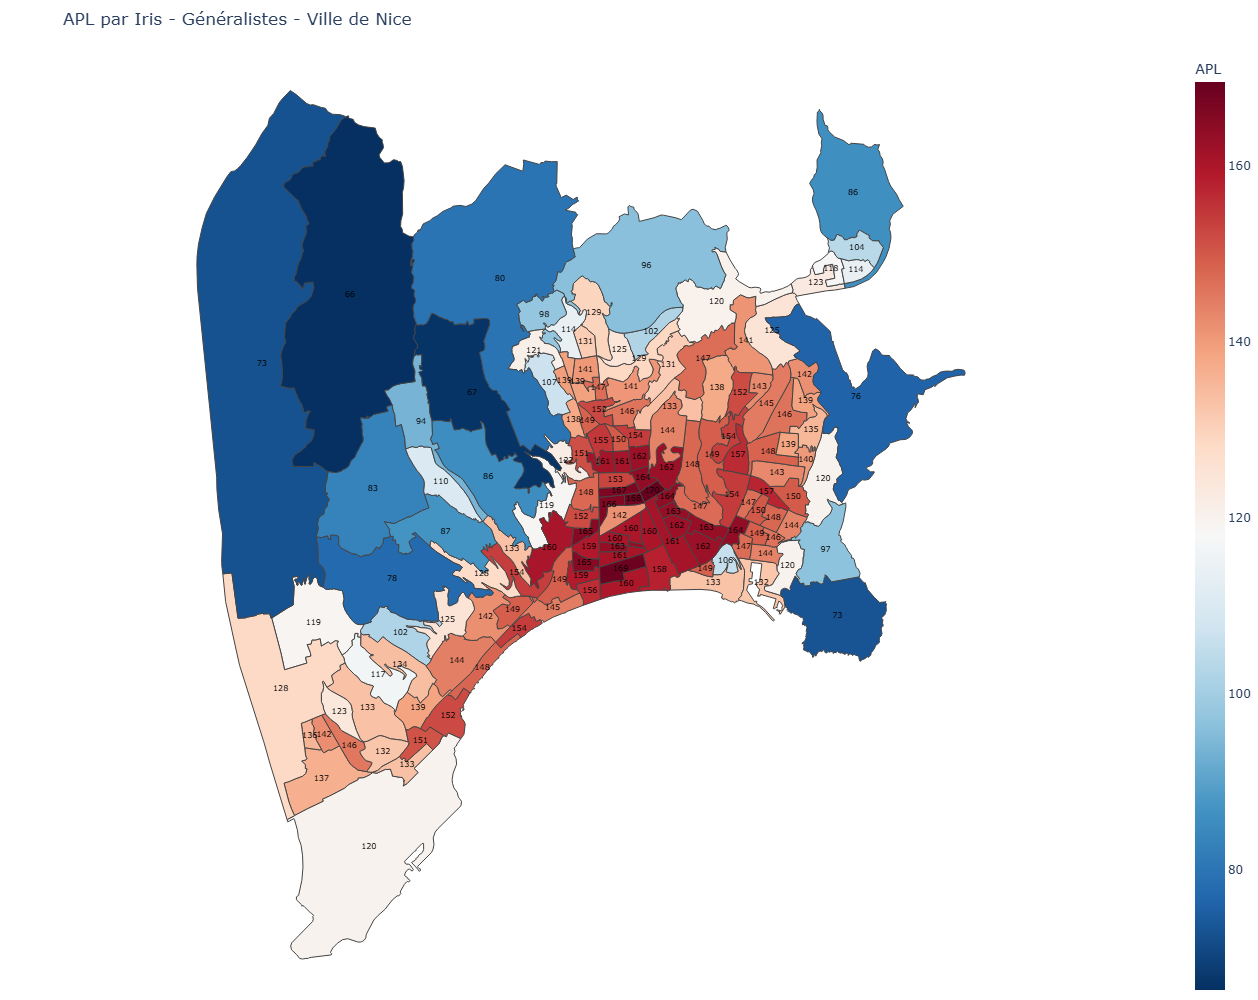

In [21]:
# Créer la figure
fig = go.Figure()

z_values=gdf["apl"]

fig.add_trace(go.Choropleth(
    geojson=geojson,
    locations=gdf["fid"],
    z=z_values,
    zmin=z_values.min(),
    zmax=z_values.max(),
    text=gdf.apply(
        lambda row: f"Nom: {row['nom_iris']}<br>APL: {row['pretty']}<br>Nb: {row['nb']}<br>PopGP: {row['popgp_pretty']}<br>R: {row['r_pretty']}",
        axis=1
    ),
    hoverinfo="text",
    showscale=True,
    colorscale="RdBu_r",
    colorbar={"title": "APL"}
))

center_lat = gdf.geometry.centroid.y.mean()
center_lon = gdf.geometry.centroid.x.mean()

# Ajouter les étiquettes
gdf_l93 = gdf.to_crs(2154)
pts_l93 = gdf_l93.geometry.representative_point()
pts = pts_l93.to_crs(4326)

fig.add_trace(go.Scattergeo(
    lon=gdf["lon"],
    lat=gdf["lat"],
    text=gdf["pretty"].astype(str),
    mode="text",
    textfont=dict(color="black", size=8),
    hoverinfo="skip",
    showlegend=False,
    marker=dict(
            color='#99ff99',
            size=8,
            line=dict(
                color='#006600',
                width=2
            )
        ),
))

# Mise en page
fig.update_layout(
    geo=dict(
        projection_type="mercator",
        center={"lat": center_lat, "lon": center_lon},
        fitbounds="locations",
        showland=False,
        showcountries=False,
        showocean=False,
        showlakes=False,
        showrivers=False,
        visible=False
    ),
    title="APL par Iris - Généralistes - Ville de Nice",
    height=1000,
    width=1200,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [ ]:
pio.write_html(fig, file="apl_gene.html", auto_open=True, include_plotlyjs="cdn", full_html=True, config={"responsive": True})